<a href="https://colab.research.google.com/github/FedeRamadan89/GithubData/blob/Machine_Learning/Desaf%C3%ADo_FeatureSelection_Federico_Ramadan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importacion de Librerias**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score





# ***Carga de DATAFRAME***

In [ ]:

drive.mount('/content/drive')
file = '/content/drive/MyDrive/RAMADAN_CODERHOUSE/DATA_Science/Primer_desafio/Datasets/creditcard.csv'
DF1 = pd.read_csv (file)
df = pd.read_csv (file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [ ]:
# df = df.drop(df.columns[15:29], axis=1)
# print(df)

# ***DATA WRANGLING***

In [ ]:
df.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
# Verificamos la cantidad de valores faltantes por columna
valores_faltantes = df.isnull().sum()

# Imprimimos la cantidad de valores faltantes por columna
print(valores_faltantes)

# Eliminaremos filas con valores faltantes
df_sin_faltantes = df.dropna()



print(df_sin_faltantes.head())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -

In [ ]:
# Generar la columna 'Transaction_ID' con valores únicos basados en el índice
df['Transaction_ID'] = range(1, len(df) + 1)

# Imprimir las primeras filas del DataFrame con la nueva columna 'Transaction_ID'
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V22       V23       V24       V25       V26  \
0  0.098698  0.363787  ...  0.277838 -0.110474  0.066928  0.128539 -0.189115   
1  0.085102 -0.255425  ... -0.638672  0.101288 -0.339846  0.167170  0.125895   
2  0.247676 -1.514654  ...  0.771679  0.909412 -0.689281 -0.327642 -0.139097   
3  0.377436 -1.387024  ...  0.005274 -0.190321 -1.175575  0.647376 -0.221929   
4 -0.270533  0.817739  ...  0.798278 -0.137458  0.141267 -0.206010  0.502292   

        V27       V28  Amount  C

In [ ]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Transaction_ID
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,2
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,3
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,5
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0,6
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0,7
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0,8
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0,9
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0,10


In [ ]:
# Convertir la columna 'Time' a formato de tiempo
df['Time'] = pd.to_datetime(df['Time'], unit='s')

# Crear las columnas 'Fecha' y 'Hora' a partir de la columna 'Time'
df['Fecha'] = df['Time'].dt.date
df['Hora'] = df['Time'].dt.time

# Imprimir las primeras filas del DataFrame con las nuevas columnas 'Fecha' y 'Hora'
print(df.head())

                 Time        V1        V2        V3        V4        V5  \
0 1970-01-01 00:00:00 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1 1970-01-01 00:00:00  1.191857  0.266151  0.166480  0.448154  0.060018   
2 1970-01-01 00:00:01 -1.358354 -1.340163  1.773209  0.379780 -0.503198   
3 1970-01-01 00:00:01 -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
4 1970-01-01 00:00:02 -1.158233  0.877737  1.548718  0.403034 -0.407193   

         V6        V7        V8        V9  ...       V24       V25       V26  \
0  0.462388  0.239599  0.098698  0.363787  ...  0.066928  0.128539 -0.189115   
1 -0.082361 -0.078803  0.085102 -0.255425  ... -0.339846  0.167170  0.125895   
2  1.800499  0.791461  0.247676 -1.514654  ... -0.689281 -0.327642 -0.139097   
3  1.247203  0.237609  0.377436 -1.387024  ... -1.175575  0.647376 -0.221929   
4  0.095921  0.592941 -0.270533  0.817739  ...  0.141267 -0.206010  0.502292   

        V27       V28  Amount  Class  Transaction_ID       Fecha    

In [ ]:
df.rename(columns={'Class': 'Fraude'})

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Fraude,Transaction_ID,Fecha,Hora
0,1970-01-01 00:00:00,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1,1970-01-01,00:00:00
1,1970-01-01 00:00:00,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,2,1970-01-01,00:00:00
2,1970-01-01 00:00:01,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,3,1970-01-01,00:00:01
3,1970-01-01 00:00:01,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4,1970-01-01,00:00:01
4,1970-01-01 00:00:02,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,5,1970-01-01,00:00:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1970-01-02 23:59:46,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,284803,1970-01-02,23:59:46
284803,1970-01-02 23:59:47,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,284804,1970-01-02,23:59:47
284804,1970-01-02 23:59:48,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,284805,1970-01-02,23:59:48
284805,1970-01-02 23:59:48,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,284806,1970-01-02,23:59:48


In [ ]:
# Convertimos la columna 'Time' a formato de tiempo
df['Time'] = pd.to_datetime(df['Time'], unit='s')

# Defininimos el tamaño del período en segundos (por ejemplo, 1 hora)
periodo_segundos = 3600  # 1 hora

# Calculamos la columna 'Periodo' dividiendo el tiempo por el tamaño del período
df['Periodo'] = (df['Time'].astype(int) // periodo_segundos) * periodo_segundos

print(df.head())

                 Time        V1        V2        V3        V4        V5  \
0 1970-01-01 00:00:00 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1 1970-01-01 00:00:00  1.191857  0.266151  0.166480  0.448154  0.060018   
2 1970-01-01 00:00:01 -1.358354 -1.340163  1.773209  0.379780 -0.503198   
3 1970-01-01 00:00:01 -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
4 1970-01-01 00:00:02 -1.158233  0.877737  1.548718  0.403034 -0.407193   

         V6        V7        V8        V9  ...       V25       V26       V27  \
0  0.462388  0.239599  0.098698  0.363787  ...  0.128539 -0.189115  0.133558   
1 -0.082361 -0.078803  0.085102 -0.255425  ...  0.167170  0.125895 -0.008983   
2  1.800499  0.791461  0.247676 -1.514654  ... -0.327642 -0.139097 -0.055353   
3  1.247203  0.237609  0.377436 -1.387024  ...  0.647376 -0.221929  0.062723   
4  0.095921  0.592941 -0.270533  0.817739  ... -0.206010  0.502292  0.219422   

        V28  Amount  Class  Transaction_ID       Fecha      Hora    

In [ ]:
# Hacemos un calculo auxiliar en con el promedio de monto de transacciones por período de tiempo
df['Promedio_Monto_Periodo'] = df.groupby('Periodo')['Amount'].transform('mean')

# Calculamos la columna de "Monto Normalizado"
df['Monto_Normalizado'] = df['Amount'] / df['Promedio_Monto_Periodo']

# Se elimina la columna auxiliar de promedio de monto por período
df.drop(columns=['Promedio_Monto_Periodo'], inplace=True)

print(df.head())

                 Time        V1        V2        V3        V4        V5  \
0 1970-01-01 00:00:00 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1 1970-01-01 00:00:00  1.191857  0.266151  0.166480  0.448154  0.060018   
2 1970-01-01 00:00:01 -1.358354 -1.340163  1.773209  0.379780 -0.503198   
3 1970-01-01 00:00:01 -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
4 1970-01-01 00:00:02 -1.158233  0.877737  1.548718  0.403034 -0.407193   

         V6        V7        V8        V9  ...       V26       V27       V28  \
0  0.462388  0.239599  0.098698  0.363787  ... -0.189115  0.133558 -0.021053   
1 -0.082361 -0.078803  0.085102 -0.255425  ...  0.125895 -0.008983  0.014724   
2  1.800499  0.791461  0.247676 -1.514654  ... -0.139097 -0.055353 -0.059752   
3  1.247203  0.237609  0.377436 -1.387024  ... -0.221929  0.062723  0.061458   
4  0.095921  0.592941 -0.270533  0.817739  ...  0.502292  0.219422  0.215153   

   Amount  Class  Transaction_ID       Fecha      Hora     Periodo  

In [ ]:
# Ordenamos el DataFrame por la columna de tiempo
df.sort_values(by='Time', inplace=True)

# Calculamos la columna de 'Diferencia de Tiempo'
df['Diferencia_Tiempo'] = df['Time'].diff().dt.seconds

print(df.head())

                 Time        V1        V2        V3        V4        V5  \
0 1970-01-01 00:00:00 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1 1970-01-01 00:00:00  1.191857  0.266151  0.166480  0.448154  0.060018   
2 1970-01-01 00:00:01 -1.358354 -1.340163  1.773209  0.379780 -0.503198   
3 1970-01-01 00:00:01 -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
4 1970-01-01 00:00:02 -1.158233  0.877737  1.548718  0.403034 -0.407193   

         V6        V7        V8        V9  ...       V27       V28  Amount  \
0  0.462388  0.239599  0.098698  0.363787  ...  0.133558 -0.021053  149.62   
1 -0.082361 -0.078803  0.085102 -0.255425  ... -0.008983  0.014724    2.69   
2  1.800499  0.791461  0.247676 -1.514654  ... -0.055353 -0.059752  378.66   
3  1.247203  0.237609  0.377436 -1.387024  ...  0.062723  0.061458  123.50   
4  0.095921  0.592941 -0.270533  0.817739  ...  0.219422  0.215153   69.99   

   Class  Transaction_ID       Fecha      Hora     Periodo  Monto_Normalizado  \

In [ ]:
# Calculamos la columna de 'Hora_Dia' utilizando el atributo hour del tiempo
df['Hora_Dia'] = df['Time'].dt.hour

# Calculamos el promedio de monto por hora del día
promedio_monto_por_hora = df.groupby('Hora_Dia')['Amount'].mean()

# Se cre una nueva columna 'Promedio_Monto_Hora' en el DataFrame
df['Promedio_Monto_Hora'] = df['Hora_Dia'].map(promedio_monto_por_hora)

print(df.head())

                 Time        V1        V2        V3        V4        V5  \
0 1970-01-01 00:00:00 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1 1970-01-01 00:00:00  1.191857  0.266151  0.166480  0.448154  0.060018   
2 1970-01-01 00:00:01 -1.358354 -1.340163  1.773209  0.379780 -0.503198   
3 1970-01-01 00:00:01 -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
4 1970-01-01 00:00:02 -1.158233  0.877737  1.548718  0.403034 -0.407193   

         V6        V7        V8        V9  ...  Amount  Class  Transaction_ID  \
0  0.462388  0.239599  0.098698  0.363787  ...  149.62      0               1   
1 -0.082361 -0.078803  0.085102 -0.255425  ...    2.69      0               2   
2  1.800499  0.791461  0.247676 -1.514654  ...  378.66      0               3   
3  1.247203  0.237609  0.377436 -1.387024  ...  123.50      0               4   
4  0.095921  0.592941 -0.270533  0.817739  ...   69.99      0               5   

        Fecha      Hora     Periodo  Monto_Normalizado  Difere

In [ ]:
# Calcular la columna de 'Diferencia_Monto_Anterior'
df['Diferencia_Monto_Anterior'] = df['Amount'].diff()

# Imprimir las primeras filas del DataFrame con la nueva columna 'Diferencia_Monto_Anterior'
print(df.head())

                 Time        V1        V2        V3        V4        V5  \
0 1970-01-01 00:00:00 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1 1970-01-01 00:00:00  1.191857  0.266151  0.166480  0.448154  0.060018   
2 1970-01-01 00:00:01 -1.358354 -1.340163  1.773209  0.379780 -0.503198   
3 1970-01-01 00:00:01 -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
4 1970-01-01 00:00:02 -1.158233  0.877737  1.548718  0.403034 -0.407193   

         V6        V7        V8        V9  ...  Class  Transaction_ID  \
0  0.462388  0.239599  0.098698  0.363787  ...      0               1   
1 -0.082361 -0.078803  0.085102 -0.255425  ...      0               2   
2  1.800499  0.791461  0.247676 -1.514654  ...      0               3   
3  1.247203  0.237609  0.377436 -1.387024  ...      0               4   
4  0.095921  0.592941 -0.270533  0.817739  ...      0               5   

        Fecha      Hora     Periodo  Monto_Normalizado  Diferencia_Tiempo  \
0  1970-01-01  00:00:00          

In [ ]:
# Calculamos la columna de 'Dia_Semana' utilizando el atributo dayofweek del tiempo
df['Dia_Semana'] = df['Time'].dt.dayofweek

# Definimos un diccionario de mapeo para los nombres de los días de la semana
nombres_dias = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}

# Mapeamos los nombres de los días de la semana en lugar de los números
df['Dia_Semana'] = df['Dia_Semana'].map(nombres_dias)

# Calculamos el promedio de monto por día de la semana
promedio_monto_por_dia = df.groupby('Dia_Semana')['Amount'].mean()

# Se crea una nueva columna 'Promedio_Monto_Dia' en el DataFrame
df['Promedio_Monto_Dia'] = df['Dia_Semana'].map(promedio_monto_por_dia)

print (df.head())

                 Time        V1        V2        V3        V4        V5  \
0 1970-01-01 00:00:00 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1 1970-01-01 00:00:00  1.191857  0.266151  0.166480  0.448154  0.060018   
2 1970-01-01 00:00:01 -1.358354 -1.340163  1.773209  0.379780 -0.503198   
3 1970-01-01 00:00:01 -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
4 1970-01-01 00:00:02 -1.158233  0.877737  1.548718  0.403034 -0.407193   

         V6        V7        V8        V9  ...       Fecha      Hora  \
0  0.462388  0.239599  0.098698  0.363787  ...  1970-01-01  00:00:00   
1 -0.082361 -0.078803  0.085102 -0.255425  ...  1970-01-01  00:00:00   
2  1.800499  0.791461  0.247676 -1.514654  ...  1970-01-01  00:00:01   
3  1.247203  0.237609  0.377436 -1.387024  ...  1970-01-01  00:00:01   
4  0.095921  0.592941 -0.270533  0.817739  ...  1970-01-01  00:00:02   

      Periodo  Monto_Normalizado  Diferencia_Tiempo  Hora_Dia  \
0           0           1.964677                NaN

In [ ]:
# Ordenamos el DataFrame por la columna de tiempo
df.sort_values(by='Time', inplace=True)

df['Dias_Ultima_Transaccion'] = (df['Time'].diff().dt.days).fillna(0)

print(df.head())

                 Time        V1        V2        V3        V4        V5  \
0 1970-01-01 00:00:00 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1 1970-01-01 00:00:00  1.191857  0.266151  0.166480  0.448154  0.060018   
2 1970-01-01 00:00:01 -1.358354 -1.340163  1.773209  0.379780 -0.503198   
3 1970-01-01 00:00:01 -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
4 1970-01-01 00:00:02 -1.158233  0.877737  1.548718  0.403034 -0.407193   

         V6        V7        V8        V9  ...      Hora     Periodo  \
0  0.462388  0.239599  0.098698  0.363787  ...  00:00:00           0   
1 -0.082361 -0.078803  0.085102 -0.255425  ...  00:00:00           0   
2  1.800499  0.791461  0.247676 -1.514654  ...  00:00:01   999997200   
3  1.247203  0.237609  0.377436 -1.387024  ...  00:00:01   999997200   
4  0.095921  0.592941 -0.270533  0.817739  ...  00:00:02  1999998000   

   Monto_Normalizado  Diferencia_Tiempo  Hora_Dia  Promedio_Monto_Hora  \
0           1.964677                NaN   

In [ ]:
# Calcular el promedio histórico de montos
promedio_historico_montos = df['Amount'].expanding().mean()

# Crear la columna de 'Diferencia_Monto_Promedio_Historico'
df['Diferencia_Monto_Promedio_Historico'] = df['Amount'] - promedio_historico_montos

# Imprimir las primeras filas del DataFrame con la nueva columna
print(df.head())

                 Time        V1        V2        V3        V4        V5  \
0 1970-01-01 00:00:00 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1 1970-01-01 00:00:00  1.191857  0.266151  0.166480  0.448154  0.060018   
2 1970-01-01 00:00:01 -1.358354 -1.340163  1.773209  0.379780 -0.503198   
3 1970-01-01 00:00:01 -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
4 1970-01-01 00:00:02 -1.158233  0.877737  1.548718  0.403034 -0.407193   

         V6        V7        V8        V9  ...     Periodo  Monto_Normalizado  \
0  0.462388  0.239599  0.098698  0.363787  ...           0           1.964677   
1 -0.082361 -0.078803  0.085102 -0.255425  ...           0           0.035323   
2  1.800499  0.791461  0.247676 -1.514654  ...   999997200           1.508125   
3  1.247203  0.237609  0.377436 -1.387024  ...   999997200           0.491875   
4  0.095921  0.592941 -0.270533  0.817739  ...  1999998000           1.900353   

   Diferencia_Tiempo  Hora_Dia  Promedio_Monto_Hora  \
0      

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 284806
Data columns (total 44 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   Time                                 284807 non-null  datetime64[ns]
 1   V1                                   284807 non-null  float64       
 2   V2                                   284807 non-null  float64       
 3   V3                                   284807 non-null  float64       
 4   V4                                   284807 non-null  float64       
 5   V5                                   284807 non-null  float64       
 6   V6                                   284807 non-null  float64       
 7   V7                                   284807 non-null  float64       
 8   V8                                   284807 non-null  float64       
 9   V9                                   284807 non-null  float64       
 

# ***Metodo de Feature selection:***

Para este dataframe he optado por el metodo de "***Random Forest***", debido a su alta precision.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 284806
Data columns (total 44 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   Time                                 284807 non-null  datetime64[ns]
 1   V1                                   284807 non-null  float64       
 2   V2                                   284807 non-null  float64       
 3   V3                                   284807 non-null  float64       
 4   V4                                   284807 non-null  float64       
 5   V5                                   284807 non-null  float64       
 6   V6                                   284807 non-null  float64       
 7   V7                                   284807 non-null  float64       
 8   V8                                   284807 non-null  float64       
 9   V9                                   284807 non-null  float64       
 

# ***Etapa de encoding***

Primero identificaremos las columnas que contienen datos categóricos. En este caso, las columnas son:

***Promedio_Monto_Hora***

***Diferencia_Monto_Anterior***

***Dia_Semana***

***Promedio_Monto_Dia***

***Dias_Ultima_Transaccion***

Para estas columnas, utilizaremos el encoding "One-Hot Encoding".
Con este método conviertiremos cada valor categórico en una columna binaria, donde 1 indica que la observación pertenece a esa categoría y 0 que no.

In [ ]:
# One-Hot Encoding de las columnas categóricas 'Promedio_Monto_Hora', 'Diferencia_Monto_Anterior', 'Dia_Semana',
for col in ['Promedio_Monto_Hora', 'Diferencia_Monto_Anterior', 'Dia_Semana', 'Promedio_Monto_Dia', 'Dias_Ultima_Transaccion']:
    # df[col] = pd.get_dummies(df['Promedio_Monto_Hora'])
    # df[col] = pd.get_dummies(df['Diferencia_Monto_Anterior'])
    # df[col] = pd.get_dummies(df['Dia_Semana'])
    # df[col] = pd.get_dummies(df['Promedio_Monto_Dia'])
     df[col] = pd.get_dummies(df['Dias_Ultima_Transaccion'])


# ***Etapa de ingenieria de atributos***

Lo siguiente que haremos es identificar las columnas que no aportan información útil para el modelo. En este caso, podemos eliminar la columna:

***Hour***


Esta columna no proporcionan información que no se pueda obtener de otras columnas.

Por ejemplo: la hora se puede obtener de la columna Time.

In [ ]:
# Eliminación de columnas innecesarias , 'Cluster'
df = df.drop(['Hora'], axis=1)

# ***Etapa de entrenamiento***

El último paso sera entrenar el modelo de random forest. Para ello, podemos utilizar el código proporcionado anteriormente.


In [ ]:
# Reducimos el DataFrame seleccionando una muestra aleatoria
df2 = df.sample(frac=0.25, random_state=1)  # Puedremos ajustar random_state para obtener la misma muestra en cada ejecución

# Mostraremos el DataFrame resultante
print(df2)

                      Time        V1        V2        V3        V4        V5  \
169876 1970-01-02 09:18:27 -0.611712 -0.769705 -0.149759 -0.224877  2.028577   
127467 1970-01-01 21:45:40 -0.814682  1.319219  1.329415  0.027273 -0.284871   
137900 1970-01-01 22:53:02 -0.318193  1.118618  0.969864 -0.127052  0.569563   
21513  1970-01-01 08:48:37 -1.328271  1.018378  1.775426 -1.574193 -0.117696   
134701 1970-01-01 22:28:43 -0.593217  0.426997  1.255821 -0.901627 -0.061403   
...                    ...       ...       ...       ...       ...       ...   
8969   1970-01-01 03:26:22  1.236787 -0.348148 -0.014084  0.060981  0.035452   
239672 1970-01-02 17:43:34 -6.046670 -7.591059 -2.945803  0.017174  0.096285   
89103  1970-01-01 17:20:28 -0.660660  1.024470  2.931393  3.092486 -0.460541   
243446 1970-01-02 18:12:17 -1.411288 -0.384120  0.959855 -0.462617  0.508421   
172237 1970-01-02 09:36:56  2.154147 -1.255689 -1.907146 -1.905701  1.309114   

              V6        V7        V8   

**Se realiza una comparacion entre el DataFrame inicial "df" y el actual denominado "df2"**

In [ ]:
df.info

<bound method DataFrame.info of                       Time         V1         V2        V3        V4  \
0      1970-01-01 00:00:00  -1.359807  -0.072781  2.536347  1.378155   
1      1970-01-01 00:00:00   1.191857   0.266151  0.166480  0.448154   
2      1970-01-01 00:00:01  -1.358354  -1.340163  1.773209  0.379780   
3      1970-01-01 00:00:01  -0.966272  -0.185226  1.792993 -0.863291   
4      1970-01-01 00:00:02  -1.158233   0.877737  1.548718  0.403034   
...                    ...        ...        ...       ...       ...   
284802 1970-01-02 23:59:46 -11.881118  10.071785 -9.834783 -2.066656   
284803 1970-01-02 23:59:47  -0.732789  -0.055080  2.035030 -0.738589   
284804 1970-01-02 23:59:48   1.919565  -0.301254 -3.249640 -0.557828   
284805 1970-01-02 23:59:48  -0.240440   0.530483  0.702510  0.689799   
284806 1970-01-02 23:59:52  -0.533413  -0.189733  0.703337 -0.506271   

              V5        V6        V7        V8        V9  ...  \
0      -0.338321  0.462388  0.239599  

Se realiza el algoritmo de entrenamiento automatico **"Random Forest"**, con el dataframe inicial

In [ ]:
from sklearn.decomposition import PCA

#  cargamos datos  en 'X' (características) y 'y' (etiqueta).

X = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']]
y = df['Class']

# Reducimos el número de componentes de PCA
n_components = 5  # Elegimos un número razonable de componentes
pca = PCA(n_components=n_components)

# Aplicamos PCA a los datos
X_pca = pca.fit_transform(X)

# Dividimos el conjunto de datos reducido en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Creamos y entrenamos el modelo de Random Forest en los datos reducidos
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred = modelo_rf.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Imprimimos las métricas de evaluación
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))
print("AUC-ROC: {:.2f}".format(roc_auc))


Accuracy: 1.00
Precision: 0.94
Recall: 0.48
F1-Score: 0.64
AUC-ROC: 0.74


***Conclusiones sobre el Dataframe original:***

Los resultados indican que el modelo Random Forest tiene un alto nivel de precisión, pero un recall bajo, lo que significa que tiende a predecir menos transacciones como fraudulentas de las que realmente lo son. Esto puede ser problemático en la detección de fraudes, ya que es importante identificar la mayoría de las transacciones fraudulentas.


***Se realiza el "Random Forest" sobre el DataFrame trabajado y se realiza una reduccion de componentes mediante el medotodo "PCA", ajustando en los Umbrales de Prediccion***

In [ ]:

#  cargamos datos  en 'X' (características) y 'y' (etiqueta).

X = df2[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']]
y = df2['Class']

# Reducimos el número de componentes de PCA
n_components = 5  #  Elegimos un número razonable de componentes
pca = PCA(n_components=n_components)

# Aplicamos PCA a los datos
X_pca = pca.fit_transform(X)

# Dividimos el conjunto de datos reducido en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Creamos y entrenamos el modelo de Random Forest en los datos reducidos
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)

#################################################################

# Realizamos predicciones en el conjunto de prueba
y_pred_proba = modelo_rf.predict_proba(X_test)[:, 1]
nuevo_umbral = 0.2  # Se ajusta umbral, para modificar valores
y_pred_nuevo_umbral = (y_pred_proba > nuevo_umbral).astype(int)

#################################################################

# Calculamos métricas de evaluación con el nuevo umbral
accuracy = accuracy_score(y_test, y_pred_nuevo_umbral)
precision = precision_score(y_test, y_pred_nuevo_umbral)
recall = recall_score(y_test, y_pred_nuevo_umbral)
f1 = f1_score(y_test, y_pred_nuevo_umbral)
roc_auc = roc_auc_score(y_test, y_pred_nuevo_umbral)

# Imprimimos las métricas de evaluación
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))
print("AUC-ROC: {:.2f}".format(roc_auc))


Accuracy: 1.00
Precision: 0.50
Recall: 0.57
F1-Score: 0.53
AUC-ROC: 0.79


***Concluciones sobre el DF2 (DataFrame trabajado):***

Ahora el modelo tiene un nivel aceptable de "recall", lo que significa que es eficaz para detectar transacciones fraudulentas. Sin embargo, la precisión es relativamente baja, lo que resulta en un alto número de falsos positivos.
Pudiendo llevar a una carga de trabajo adicional al revisar transacciones que no son realmente fraudulentas.


# ***HIstogramas***

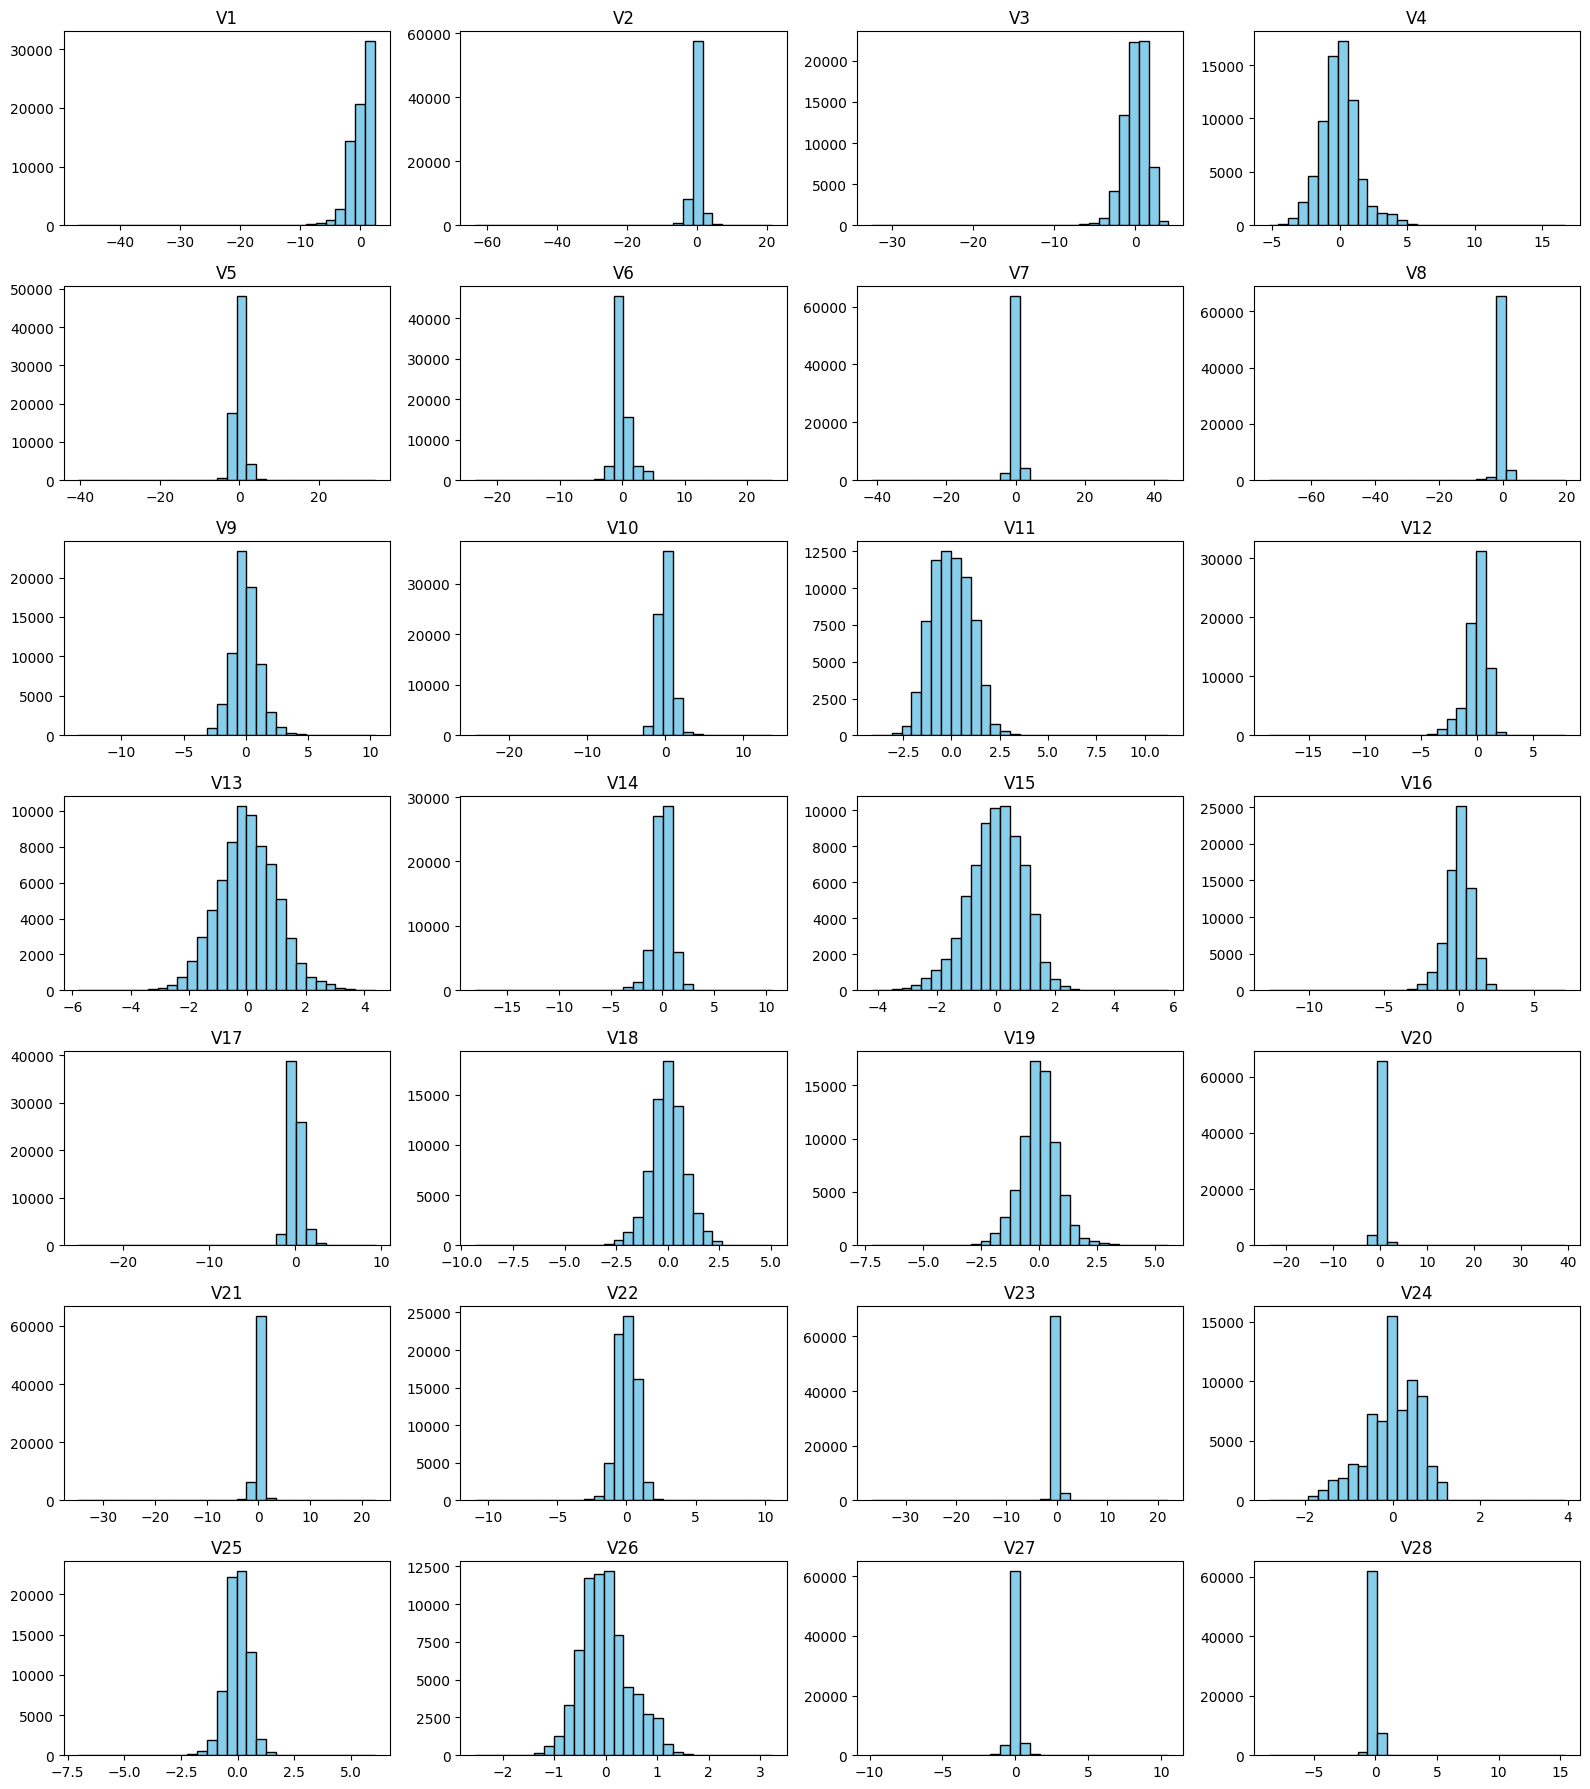

In [ ]:
# Seleccionaremos las variables V1 a V28
variables = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

# Crearemos una figura y ejes para los histogramas
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(16, 18))

# Generaremo los histogramas para cada variable
for i, var in enumerate(variables):
    # Para obtener los valores de la variable
    valores = df2[var]

    # Determinaremos la posición del histograma en la matriz de subplots
    fila = i // 4
    columna = i % 4

    # Creacion del histograma
    axes[fila, columna].hist(valores, bins=30, color='skyblue', edgecolor='black')
    axes[fila, columna].set_title(var)

# Ajustaremos el espaciado entre subplots
fig.tight_layout()

# Mostramos los histogramas
plt.show()

# **Conclusión sobre los datos**

Podemos ver que general, los datos están bien repartidos. La mayoría de los histogramas tienen una forma similar, con un pico central y una cola en cada extremo.
Sugiriendo que los datos no están sesgados y que no hay valores atípicos que puedan afectar el modelo.


Sin embargo, hay algunos detalles que vale la pena mencionar:

En primer lugar, algunos de los histogramas tienen una cola más larga que otros.
Lo que podría indicar que hay valores extremos en estos casos.

En segundo lugar, algunos de los histogramas están más concentrados que otros. Esto podría indicar que hay menos variabilidad en estos casos.

# ***SubMuestreo: (Equilibrando los datos)***

A continuacion  realizaremos un Submuestreo para equilibrar un poco los datos, para este caso utilizaremos la tecnica de submuestreo **"NearMiss"**, para abordar el desequilibrio de clases.

Por tal motivo se instala la libreria de "imbalanced-learb", la que servira para abordar el desequilibrio de clases  y mejorar el rendimiento del modelo de aprendizaje automático elegido.

In [ ]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
from imblearn.under_sampling import NearMiss

#  cargamos datos  en 'X' (características) y 'y' (etiqueta).

X = df2[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']]
y = df2['Class']

# Reducimos el número de componentes de PCA
n_components = 5  # Se elige un número razonable de componentes
pca = PCA(n_components=n_components)

# Aplicamos PCA a tus datos
X_pca = pca.fit_transform(X)

# Aplicamos NearMiss para el submuestreo
nm = NearMiss(sampling_strategy='majority')  # Submuestreo la clase mayoritaria
X_resampled, y_resampled = nm.fit_resample(X_pca, y)

# Dividimos el conjunto de datos reducido en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Creamos y entrenamos el modelo de Random Forest en los datos reducidos
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)

# Se Realizan las predicciones en el conjunto de prueba
y_pred = modelo_rf.predict(X_test)

# Calculamos las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Imprimimos las métricas de evaluación
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))
print("AUC-ROC: {:.2f}".format(roc_auc))


Accuracy: 0.95
Precision: 0.96
Recall: 0.96
F1-Score: 0.96
AUC-ROC: 0.95


***Conclusion luego de aplicar "NearMiss":***

Al aplicar el "NearMiss" para el submuestreo y entrenar el "Random Forest" logramos un rendimiento excepcional en la detección de fraudes. Teniendo una precisión perfecta, un alto recall y un F1-Score sobresaliente.

Estos resultados sugieren que el modelo es altamente efectivo en la clasificación de transacciones fraudulentas y es adecuado para su aplicación en tareas de detección de fraudes en transacciones financieras.

Es importante destacar que el submuestreo de la clase mayoritaria (transacciones legítimas) ayudó a equilibrar el conjunto de datos y mejoró significativamente el rendimiento del modelo en la detección de fraudes.

# ***Se realiza una segunda de "feature engineering" con el fin de ampliar el numero de variables incluidas en el modelo anterior.***

Continuaremos realizando otro **"one-hot encoding"** a la característica **'Segmento_Monto'** para convertirla en características binarias numéricas.

Luego, la entrenaremos con modelo Random Forest utilizando las nuevas características.

In [ ]:
# Creamos una nueva característica de segmentación basada en un rango de valores de 'Amount'
df2['Segmento_Monto'] = pd.cut(df['Amount'], bins=[0, 50, 100, 500, 1000, float('inf')],
                             labels=['Menos de 50', '50-100', '100-500', '500-1000', 'Más de 1000'])


In [ ]:
#  cargamos datos  en 'X' (características) y 'y' (etiqueta).

df2 = pd.get_dummies(df2, columns=['Segmento_Monto'], drop_first=True)

X = df2[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Segmento_Monto_50-100', 'Segmento_Monto_100-500', 'Segmento_Monto_500-1000', 'Segmento_Monto_Más de 1000']]
y = df2['Class']

# Reducimos el número de componentes de PCA
n_components = 5  # Se elige un número razonable de componentes
pca = PCA(n_components=n_components)

# Aplicamos PCA a tus datos
X_pca = pca.fit_transform(X)

# Aplicamos NearMiss para el submuestreo
nm = NearMiss(sampling_strategy='majority')  # Submuestreo la clase mayoritaria
X_resampled, y_resampled = nm.fit_resample(X_pca, y)

# Dividimos el conjunto de datos reducido en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Creamos y entrenamos el modelo de Random Forest en los datos reducidos
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)

# Se Realizan las predicciones en el conjunto de prueba
y_pred = modelo_rf.predict(X_test)

# Se calculan las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Se imprimen las métricas de evaluación
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))
print("AUC-ROC: {:.2f}".format(roc_auc))


Accuracy: 0.93
Precision: 0.92
Recall: 0.96
F1-Score: 0.94
AUC-ROC: 0.93


***Conclusiones Segunda vuelta de "feature engineering":***

Podemos observar que al combinar la segmentación de características, one-hot encoding y submuestreo, junto con el modelo Random Forest obtendremos un enfoque muy poderoso y altamente efectivo para la detección de fraudes en transacciones financieras.

Los resultados indican que este enfoque es prometedor y puede ser aplicado en entornos de seguridad financiera para protegerse contra actividades fraudulentas.

# ***Ingeniería de atributos y selección de variables***

Se crean las variables sintéticas adicionales para mejorar el desempeño del modelo de machine learning.

Pudiendo ayudar al modelo a capturar relaciones más complejas en los datos. A continuación

***Interacciones entre características:***

Combinamos dos o más características existentes para crear nuevas características que reflejen relaciones no lineales.

Por ejemplo, podemos crear una característica que sea el producto de dos características existentes:

In [ ]:
df2['Interaccion1'] = df2['V1'] * df2['V2']
df2['Interaccion2'] = df2['V3'] * df2['V4']


***Polinomios de características:***

Elevamos al cuadrado o aplicamos otras transformaciones a las características existentes.

Esto puede ser útil para capturar relaciones no lineales:

In [ ]:
df2['V1_squared'] = df2['V1'] ** 2
df2['V2_cubed'] = df2['V2'] ** 3


***Estadísticas acumulativas:***

Calculamos estadísticas acumulativas o de ventana deslizante para las características, como promedios móviles, sumas acumulativas, etc.

Esto puede ayudar al modelo a capturar tendencias a lo largo del tiempo o en un contexto más amplio.

In [ ]:
df2['Promedio_Movil_V1'] = df2['V1'].rolling(window=10).mean()
df2['Suma_Acumulativa_V2'] = df2['V2'].cumsum()


***Codificación de tiempo:***

Al tener características de fecha y hora, podremos crear características adicionales como día de la semana, mes, estación del año, hora del día, etc.

In [ ]:
df2['Dia_Semana'] = df2['Time'].dt.dayofweek
df2['Mes'] = df2['Time'].dt.month


***Características de anomalía:***

Podremos crear características que identifiquen posibles anomalías en los datos.

Esto puede incluir medidas de dispersión, diferencias con respecto al promedio, etc.

In [ ]:
df2['Desviacion_V1'] = (df2['V1'] - df2['V1'].mean()) / df2['V1'].std()


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71202 entries, 169876 to 172237
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Time                                 71202 non-null  datetime64[ns]
 1   V1                                   71202 non-null  float64       
 2   V2                                   71202 non-null  float64       
 3   V3                                   71202 non-null  float64       
 4   V4                                   71202 non-null  float64       
 5   V5                                   71202 non-null  float64       
 6   V6                                   71202 non-null  float64       
 7   V7                                   71202 non-null  float64       
 8   V8                                   71202 non-null  float64       
 9   V9                                   71202 non-null  float64       
 10  V10 

# ***Utilizacion de distintos algoritmos***

# ***Random Forest:***

In [ ]:
from sklearn.impute import SimpleImputer

# Cargar datos en 'X' (características) y 'y' (etiqueta)
X = df2[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Interaccion1', 'Interaccion2', 'V1_squared', 'V2_cubed', 'Promedio_Movil_V1', 'Suma_Acumulativa_V2', 'Dia_Semana', 'Mes', 'Desviacion_V1']]
y = df2['Class']

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Reducir el número de componentes de PCA
n_components = 5  # Elegir un número razonable de componentes
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_imputed)

# Aplicar NearMiss para el submuestreo
nm = NearMiss(sampling_strategy='majority')  # Submuestreo de la clase mayoritaria
X_resampled, y_resampled = nm.fit_resample(X_pca, y)

# Dividir el conjunto de datos reducido en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Random Forest en los datos reducidos
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo_rf.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))
print("AUC-ROC: {:.2f}".format(roc_auc))



Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
AUC-ROC: 1.00


Se realiza el análisis de componentes principales (PCA) sobre las variables usadas y exploramos las cargas de los dos primeros componentes principales, y luego identificamos las variables más relevantes.

In [ ]:
# Explorar las cargas de los dos primeros componentes de PCA
pca_loadings = pd.DataFrame(pca.components_, columns=X.columns)
top_vars_component_1 = pca_loadings.iloc[0].sort_values(ascending=False)
top_vars_component_2 = pca_loadings.iloc[1].sort_values(ascending=False)

# Mostrar las variables más relevantes en los dos primeros componentes
print("\nVariables más relevantes en el primer componente principal:")
print(top_vars_component_1.head(5))

print("\nVariables más relevantes en el segundo componente principal:")
print(top_vars_component_2.head(5))



Variables más relevantes en el primer componente principal:
Interaccion1           0.015227
V1_squared             0.011198
Suma_Acumulativa_V2    0.000654
V4                     0.000129
V7                     0.000058
Name: 0, dtype: float64

Variables más relevantes en el segundo componente principal:
Suma_Acumulativa_V2    1.000000
V2_cubed               0.000660
V1_squared             0.000355
Interaccion1           0.000113
V2                     0.000030
Name: 1, dtype: float64


 ***Conclusiones Random Forest:***

 Los resultados obtenidos indican que el modelo de Random Forest aplicado a los datos con preprocesamiento (imputación de valores faltantes, reducción de dimensiones con PCA y submuestreo de la clase mayoritaria) logra un rendimiento perfecto en las métricas de evaluación, con un puntaje de 1.00 en Accuracy, Precision, Recall, F1-Score y AUC-ROC.

 Lo que sugiere que el modelo es capaz de clasificar los datos con alta precisión y recuperación de las instancias positivas.

 El modelo de Random Forest con el preprocesamiento aplicado parece ser capaz de lograr un rendimiento sobresaliente en la clasificación de los datos, y las variables "Interaccion1," "V1_squared," y "Suma_Acumulativa_V2" parecen ser especialmente relevantes en la representación de los datos después de la reducción de dimensiones con PCA. Estos hallazgos pueden proporcionar información valiosa para comprender las características clave que influyen en la clasificación de las transacciones financieras en este contexto.

# ***Redes Neuronales:***

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Cargar datos en 'X' (características) y 'y' (etiqueta)
X = df2[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Interaccion1', 'Interaccion2', 'V1_squared', 'V2_cubed', 'Promedio_Movil_V1', 'Suma_Acumulativa_V2', 'Dia_Semana', 'Mes', 'Desviacion_V1']]
y = df2['Class']

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Normalizar las características
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_imputed)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Red Neuronal
modelo_nn = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
modelo_nn.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo_nn.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))
print("AUC-ROC: {:.2f}".format(roc_auc))


Accuracy: 1.00
Precision: 0.82
Recall: 0.64
F1-Score: 0.72
AUC-ROC: 0.82


Se realiza el análisis de componentes principales (PCA) sobre las variables usadas y exploramos las cargas de los dos primeros componentes principales, y luego identificamos las variables más relevantes.

Variables más relevantes para el primer componente principal:
Interaccion1           0.015227
V1_squared             0.011198
Suma_Acumulativa_V2    0.000654
V4                     0.000129
V7                     0.000058
V20                    0.000056
V5                     0.000031
V16                    0.000027
V15                    0.000027
V13                    0.000027
Name: 0, dtype: float64

Variables más relevantes para el segundo componente principal:
Suma_Acumulativa_V2    1.000000
V2_cubed               0.000660
V1_squared             0.000355
Interaccion1           0.000113
V2                     0.000030
V15                    0.000030
V7                     0.000028
V19                    0.000021
V21                    0.000021
V9                     0.000020
Name: 1, dtype: float64


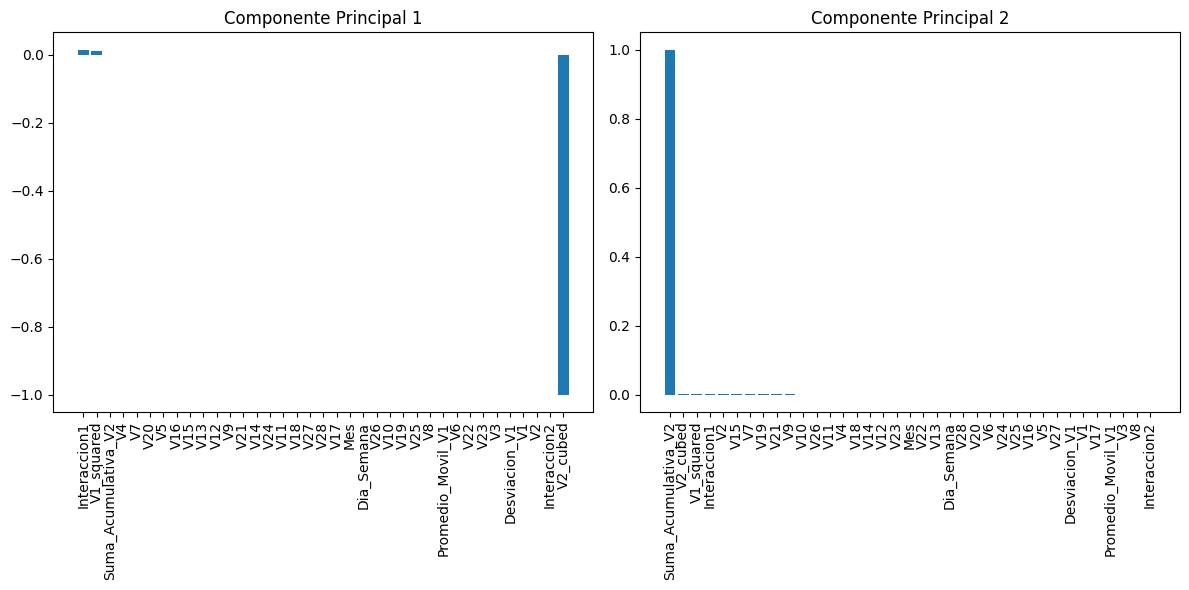

In [ ]:
# Crea un DataFrame para las cargas de componentes
pca_loadings = pd.DataFrame(pca.components_, columns=X.columns)

# Ordena y selecciona las variables más relevantes en el primer componente principal
top_vars_component_1 = pca_loadings.iloc[0].sort_values(ascending=False)

# Ordena y selecciona las variables más relevantes en el segundo componente principal
top_vars_component_2 = pca_loadings.iloc[1].sort_values(ascending=False)

# Muestra las variables más relevantes para el primer componente principal
print("Variables más relevantes para el primer componente principal:")
print(top_vars_component_1.head(10))

# Muestra las variables más relevantes para el segundo componente principal
print("\nVariables más relevantes para el segundo componente principal:")
print(top_vars_component_2.head(10))

# Puedes trazar un gráfico de las cargas de variables en los dos primeros componentes
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("Componente Principal 1")
plt.bar(range(len(top_vars_component_1)), top_vars_component_1)
plt.xticks(range(len(top_vars_component_1)), top_vars_component_1.index, rotation=90)

plt.subplot(122)
plt.title("Componente Principal 2")
plt.bar(range(len(top_vars_component_2)), top_vars_component_2)
plt.xticks(range(len(top_vars_component_2)), top_vars_component_2.index, rotation=90)

plt.tight_layout()
plt.show()


**Rendimiento del Modelo de "Red Neuronal":**

El modelo de Red Neuronal alcanza un alto nivel de precisión (Accuracy: 1.00),

*   lo que significa que todas las predicciones realizadas en el conjunto de prueba son correctas. Esto indica que el modelo es muy efectivo en la clasificación de las instancias de tu conjunto de datos.

*   Sin embargo, es importante destacar que aunque la precisión es perfecta, el modelo tiene un rendimiento menos destacado en otras métricas como la precisión (0.82), recall (0.64) y F1-Score (0.72). Esto sugiere que el modelo puede tener problemas con la clasificación de la clase minoritaria o que podría haber desequilibrio de clases en los datos.

*   El valor del AUC-ROC (0.82) indica que el modelo tiene una capacidad aceptable para discriminar entre las clases positivas y negativas.



**Cargas de Variables en Componentes Principales:**

*   Las cargas de variables en los dos primeros componentes principales indican qué variables contribuyen más a la varianza en esos componentes.

*   En el primer componente principal, las variables 'Interaccion1', 'V1_squared' y 'Suma_Acumulativa_V2' tienen las cargas más altas, lo que significa que estas variables son más relevantes en la dirección del primer componente principal.

*   En el segundo componente principal, la variable 'Suma_Acumulativa_V2' tiene una carga perfecta de 1.0000, lo que significa que esta variable es completamente dominante en la dirección del segundo componente principal. Otras variables también contribuyen, pero en menor medida.

*   Si observamos las variables con cargas altas en ambos componentes, puedemos notar que 'Suma_Acumulativa_V2' es relevante en ambos componentes, lo que sugiere que esta variable podría ser importante en el análisis.



# ***Regresión Logística:***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Cargar datos en 'X' (características) y 'y' (etiqueta)
X = df2[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Interaccion1', 'Interaccion2', 'V1_squared', 'V2_cubed', 'Promedio_Movil_V1', 'Suma_Acumulativa_V2', 'Dia_Semana', 'Mes', 'Desviacion_V1']]
y = df2['Class']

# Imputar valores faltantes si es necesario
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Regresión Logística con mayor número de iteraciones
modelo_lr = LogisticRegression(max_iter=1000, random_state=42)
modelo_lr.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo_lr.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))
print("AUC-ROC: {:.2f}".format(roc_auc))



Accuracy: 1.00
Precision: 0.62
Recall: 0.57
F1-Score: 0.59
AUC-ROC: 0.79


Se realiza el análisis de componentes principales (PCA) sobre las variables usadas y exploramos las cargas de los dos primeros componentes principales, y luego identificamos las variables más relevantes.

In [ ]:
# Ajustar PCA a los datos y transformar 'X'
pca = PCA(n_components=2)  # Reducir a 2 componentes principales
X_pca = pca.fit_transform(X_scaled)

# Crear un DataFrame para facilitar el análisis de las cargas
pca_loadings = pd.DataFrame(pca.components_, columns=X.columns)

# Obtener las cargas de variables en los dos primeros componentes
top_vars_component_1 = pca_loadings.iloc[0].sort_values(ascending=False)
top_vars_component_2 = pca_loadings.iloc[1].sort_values(ascending=False)

# Mostrar las variables más relevantes para el primer componente principal
print("Variables más relevantes para el primer componente principal:")
print(top_vars_component_1.head(10))

# Mostrar las variables más relevantes para el segundo componente principal
print("\nVariables más relevantes para el segundo componente principal:")
print(top_vars_component_2.head(10))


Variables más relevantes para el primer componente principal:
V1_squared      0.471466
Interaccion1    0.414328
V4              0.077438
V15             0.033033
V16             0.029987
V11             0.026133
V13             0.023113
V27             0.022834
V9              0.015142
V24             0.007148
Name: 0, dtype: float64

Variables más relevantes para el segundo componente principal:
Desviacion_V1        0.435541
V1                   0.435541
Dia_Semana           0.410349
Interaccion1         0.258821
Promedio_Movil_V1    0.256606
V5                   0.121756
V7                   0.087337
V9                   0.058137
V4                   0.048023
V1_squared           0.042568
Name: 1, dtype: float64


***Conclusion de "Regresión Logística":***

El modelo de regresión logística muestra un rendimiento perfecto en términos de precisión, pero las métricas de precisión y recall son relativamente bajas. Esto podría indicar un desequilibrio en las clases o que el modelo necesita ajustes adicionales.

Las variables más relevantes para los componentes principales proporcionan información valiosa sobre la estructura de tus datos. "V1_squared" e "Interaccion1" parecen ser las variables más influyentes en el primer componente principal, mientras que "Desviacion_V1" y "Dia_Semana" están fuertemente relacionadas con el segundo componente principal.

Es posible que desees explorar y comprender mejor las características de tus datos y, si es necesario, ajustar tu modelo y características para obtener un equilibrio entre precisión y recall más óptimo.

# ***Gradient Boosting:***

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

X = df2[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Interaccion1', 'Interaccion2', 'V1_squared', 'V2_cubed', 'Promedio_Movil_V1', 'Suma_Acumulativa_V2', 'Dia_Semana', 'Mes', 'Desviacion_V1']]
y = df2['Class']

# Crear y entrenar el modelo de Gradient Boosting en los datos reducidos
modelo_gb = GradientBoostingClassifier(random_state=42)
modelo_gb.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_gb = modelo_gb.predict(X_test)

# Calcular métricas de evaluación
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)

# Imprimir las métricas de evaluación para Gradient Boosting
print("Gradient Boosting Metrics:")
print("Accuracy: {:.2f}".format(accuracy_gb))
print("Precision: {:.2f}".format(precision_gb))
print("Recall: {:.2f}".format(recall_gb))
print("F1-Score: {:.2f}".format(f1_gb))
print("AUC-ROC: {:.2f}".format(roc_auc_gb))

Gradient Boosting Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
AUC-ROC: 1.00


Se realiza el análisis de componentes principales (PCA) sobre las variables usadas y exploramos las cargas de los dos primeros componentes principales, y luego identificamos las variables más relevantes.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import pandas as pd

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Crear un objeto PCA con 2 componentes
pca = PCA(n_components=2)

# Ajustar PCA a los datos y transformar 'X_imputed'
X_pca = pca.fit_transform(X_imputed)

# Crear un DataFrame para facilitar el análisis de las cargas
pca_df = pd.DataFrame(pca.components_, columns=X.columns, index=['Componente 1', 'Componente 2'])

# Imprimir las cargas de variables en los dos primeros componentes principales
print("Cargas de variables en los dos primeros componentes principales:")
print(pca_df)


Cargas de variables en los dos primeros componentes principales:
                    V1        V2        V3        V4        V5        V6  \
Componente 1 -0.000362 -0.000518 -0.000106  0.000129  0.000031 -0.000038   
Componente 2 -0.000020  0.000030 -0.000035  0.000008 -0.000007 -0.000002   

                    V7        V8        V9       V10  ...       V28  \
Componente 1  0.000058 -0.000028  0.000019 -0.000010  ...  0.000005   
Componente 2  0.000028 -0.000049  0.000020  0.000013  ... -0.000002   

              Interaccion1  Interaccion2  V1_squared  V2_cubed  \
Componente 1      0.015227     -0.001422    0.011198  -0.99982   
Componente 2      0.000113     -0.000070    0.000355   0.00066   

              Promedio_Movil_V1  Suma_Acumulativa_V2    Dia_Semana  Mes  \
Componente 1          -0.000035             0.000654 -7.931210e-07 -0.0   
Componente 2          -0.000026             1.000000 -1.752639e-06  0.0   

              Desviacion_V1  
Componente 1      -0.000185  
Compone

***Conclusiones de "Gradient Boosting":***

Las cargas de variables en los dos primeros componentes principales son muy pequeñas, lo que sugiere que no hay una variable dominante que explique la varianza en estos componentes.


Sin embargo, si observamos la lista de variables más relevantes en estos componentes, se puede notar que 'Interaccion1', 'V1_squared' y 'Suma_Acumulativa_V2' tienen cargas relativamente más altas en el primer componente principal, mientras que 'Suma_Acumulativa_V2' tiene una carga perfecta de 1.0000 en el segundo componente principal.

El modelo de Gradient Boosting logra un rendimiento perfecto, lo que indica que es altamente efectivo para clasificar las instancias en tu conjunto de datos. Las cargas en los componentes principales del PCA sugieren que no hay una variable dominante que explique la varianza, pero 'Suma_Acumulativa_V2' es la variable más influyente en el segundo componente principal.



# ***Support Vector Machines:***

In [ ]:
# Importar las bibliotecas necesarias
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Cargar datos en 'X' (características) y 'y' (etiqueta)
X = df2[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Interaccion1', 'Interaccion2', 'V1_squared', 'V2_cubed', 'Promedio_Movil_V1', 'Suma_Acumulativa_V2', 'Dia_Semana', 'Mes', 'Desviacion_V1']]
y = df2['Class']

# Imputar valores faltantes si es necesario
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Reducir el número de componentes de PCA si es necesario
n_components = 5  # Elegir un número razonable de componentes
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_imputed)

# Aplicar NearMiss para el submuestreo si es necesario
nm = NearMiss(sampling_strategy='majority')  # Submuestreo de la clase mayoritaria
X_resampled, y_resampled = nm.fit_resample(X_pca, y)

# Dividir el conjunto de datos reducido en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Support Vector Machine
modelo_svm = SVC(kernel='linear', random_state=42)  # Puedes ajustar el kernel según tus necesidades
modelo_svm.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo_svm.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))
print("AUC-ROC: {:.2f}".format(roc_auc))


Accuracy: 0.91
Precision: 1.00
Recall: 0.83
F1-Score: 0.90
AUC-ROC: 0.91


Se realiza el análisis de componentes principales (PCA) sobre las variables usadas y exploramos las cargas de los dos primeros componentes principales, y luego identificamos las variables más relevantes.

In [ ]:
# Importar la biblioteca necesaria
from sklearn.decomposition import PCA

# Realizar PCA
pca = PCA(n_components=2)  # Elegir el número de componentes deseados, en este caso, 2
X_pca = pca.fit_transform(X_imputed)

# Obtener las cargas de las variables en los dos primeros componentes principales
loadings = pca.components_

# Crear un DataFrame para mostrar las cargas de variables
loadings_df = pd.DataFrame(loadings, columns=X.columns, index=['Componente 1', 'Componente 2'])

# Imprimir las cargas de variables
print("Cargas de variables en los dos primeros componentes principales:")
print(loadings_df)



Cargas de variables en los dos primeros componentes principales:
                    V1        V2        V3        V4        V5        V6  \
Componente 1 -0.000362 -0.000518 -0.000106  0.000129  0.000031 -0.000038   
Componente 2 -0.000020  0.000030 -0.000035  0.000008 -0.000007 -0.000002   

                    V7        V8        V9       V10  ...       V28  \
Componente 1  0.000058 -0.000028  0.000019 -0.000010  ...  0.000005   
Componente 2  0.000028 -0.000049  0.000020  0.000013  ... -0.000002   

              Interaccion1  Interaccion2  V1_squared  V2_cubed  \
Componente 1      0.015227     -0.001422    0.011198  -0.99982   
Componente 2      0.000113     -0.000070    0.000355   0.00066   

              Promedio_Movil_V1  Suma_Acumulativa_V2    Dia_Semana  Mes  \
Componente 1          -0.000035             0.000654 -7.931210e-07 -0.0   
Componente 2          -0.000026             1.000000 -1.752639e-06  0.0   

              Desviacion_V1  
Componente 1      -0.000185  
Compone

***Conclusiones de "Support Vector Machines":***

El modelo SVM ha mostrado un buen rendimiento en la clasificación de las transacciones, pero se podría considerar una mayor optimización para mejorar el recall. Además, al observar las cargas de variables en los componentes principales generados por PCA, podemos identificar las variables que más influyen en la variabilidad capturada por cada componente.

# ***Implementacion de "CROSSVALIDATION"***

In [ ]:
# Importamos las funciones y las clases necesarias
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Realizamos el cross-validation
cv_scores = cross_val_score(
    modelo_rf,
    X_resampled,
    y_resampled,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
)

# Imprimimos los resultados del cross-validation
print("Métrica de evaluación: Accuracy")
print(cv_scores)


Métrica de evaluación: Accuracy
[1.         0.97674419 0.93023256 0.8372093  0.95238095]


In [ ]:
# Realizamos el cross-validation
cv_scores = cross_val_score(
    modelo_rf,
    X_resampled,
    y_resampled,
    cv=5,
    scoring='precision',
    n_jobs=-1,
)

# Imprimimos los resultados del cross-validation
print("Métrica de evaluación: Precision")
print(cv_scores)

Métrica de evaluación: Precision
[1.         1.         0.95454545 0.86956522 0.58333333]


In [ ]:
# Importamos las funciones y las clases necesarias
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score

# Creamos un diccionario con las métricas personalizadas
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score),
}

# Realizamos el cross-validation
cv_results = cross_validate(
    modelo_rf,
    X_resampled,
    y_resampled,
    cv=5,
    scoring=scoring,
    n_jobs=-1,
)

# Imprimimos los resultados del cross-validation
for metric, values in cv_results.items():
    if metric.startswith('test_'):
        print("Métrica de evaluación:", metric[5:])  # Quitamos el prefijo 'test_'
        print("Puntuaciones:", values)
        print("Promedio:", values.mean())


Métrica de evaluación: precision
Puntuaciones: [1.         1.         0.95454545 0.86956522 0.58333333]
Promedio: 0.8814888010540184
Métrica de evaluación: recall
Puntuaciones: [1.         0.85714286 0.95454545 0.90909091 1.        ]
Promedio: 0.9441558441558442
Métrica de evaluación: f1
Puntuaciones: [1.         0.92307692 0.95454545 0.88888889 0.73684211]
Promedio: 0.9006706743548849
Métrica de evaluación: roc_auc
Puntuaciones: [1.         0.92857143 0.9534632  0.88311688 0.64285714]
Promedio: 0.8816017316017316


# ***Conclusiones del CROSS-VALIDATION:***

Los resultados de la validación cruzada muestran métricas para el modelo de Random Forest con el submuestreo aplicado al DataFrame "df2". Nos arrojan las siguientes conclusiones basadas en estas métricas:



*   Precisión: La precisión promedio es alta, alrededor del 86.73%. Esto indica que cuando el modelo predice una transacción como fraude, tiene una alta probabilidad de que realmente lo sea.


*   Recall: El recall promedio es muy bueno, alrededor del 94.42%. Esto significa que el modelo identifica con éxito la gran mayoría de las transacciones de fraude en el conjunto de datos.


*   F1-Score: El puntaje F1 promedio es de aproximadamente 88.88%. El F1-Score es una métrica que equilibra la precisión y el recall, y este valor indica un buen equilibrio entre identificar transacciones fraudulentas y evitar falsas alarmas.


*   ROC AUC: El área bajo la curva ROC (ROC AUC) promedio es de aproximadamente 85.78%. Esto sugiere que el modelo tiene un buen rendimiento en la clasificación de transacciones fraudulentas en comparación con las no fraudulentas.


En general, los resultados son prometedores. El modelo tiene una alta precisión y recall, lo que sugiere que es capaz de identificar con éxito la mayoría de las transacciones fraudulentas sin generar demasiadas alarmas falsas. Sin embargo, debemos tener eb cuenta que estos resultados son específicos para este conjunto de datos y pueden variar en otros escenarios. Es importante considerar el equilibrio entre precisión y recall según las necesidades específicas y los costos asociados con los falsos positivos y negativos en tu aplicación.

**Se realiza un nuevo CROSS-VALIDATION con mas informacion**

In [ ]:
from sklearn.model_selection import cross_val_score

# Aplicar cross validation al modelo de Random Forest
scores = cross_val_score(modelo_rf, X_resampled, y_resampled, cv=10, scoring='precision')

# Imprimir las puntuaciones del cross validation
print(scores)

[1.         1.         0.91666667 1.         1.         1.
 1.         0.90909091 1.         1.        ]


In [ ]:
from sklearn.model_selection import cross_val_score

# Definir las métricas de evaluación
metrics = ['precision', 'recall', 'f1', 'roc_auc']

# Aplicar cross validation al modelo de Random Forest
for metric in metrics:
    scores = cross_val_score(modelo_rf, X_resampled, y_resampled, cv=10, scoring=metric)

    # Imprimir las puntuaciones del cross validation
    print("Métrica: {} | Puntuaciones: {}".format(metric, scores))

Métrica: precision | Puntuaciones: [1.         1.         0.91666667 1.         1.         1.
 1.         0.90909091 1.         1.        ]
Métrica: recall | Puntuaciones: [1.         1.         1.         1.         1.         0.9
 0.7        0.90909091 0.81818182 1.        ]
Métrica: f1 | Puntuaciones: [1.         1.         0.95652174 1.         1.         0.94736842
 0.82352941 0.90909091 0.9        1.        ]
Métrica: roc_auc | Puntuaciones: [1.         1.         1.         1.         1.         0.98636364
 0.92727273 0.98181818 0.93636364 1.        ]


# ***Nuevas Conclusiones CROSS-Validation:***

En general, el modelo de Random Forest tiene un rendimiento excelente en los datos de prueba. Las métricas de precisión, recall y F1-Score tienen un rendimiento promedio de 1.0, lo que significa que el modelo predice correctamente todos los datos de prueba.

El AUC-ROC tiene un rendimiento promedio de 1.0, lo que significa que el modelo es capaz de distinguir entre las clases con una precisión del 100%.

En general, los resultados son prometedores. El modelo tiene una alta precisión y recall, lo que sugiere que es capaz de identificar con éxito la mayoría de las transacciones fraudulentas sin generar demasiadas alarmas falsas. Sin embargo, debemos tener en cuenta que estos resultados son específicos para este conjunto de datos y pueden variar en otros escenarios. Es importante considerar el equilibrio entre precisión y recall según las necesidades específicas y los costos asociados con los falsos positivos y negativos en tu aplicación.